In [1]:
# Fashion-MNISTデータセットを前処理する。

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils

# データを変数に格納する。
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# データの前処理
# (60000, 28, 28)の3階テンソルを(60000, 784)の2階テンソルに変換。
x_train = x_train.reshape(60000, 784)
# (10000, 28, 28)の3階テンソルを(10000, 784)の2階テンソルに変換。
x_test = x_test.reshape(10000, 784)

# データを255.0で割って0から1.0の範囲に変換。
x_train = x_train/255.0
# データを255.0で割って0から1.0の範囲に変換。
x_test = x_test/255.0

# 正解ラベルのクラス数
num_classes = 10
# 訓練データの正解ラベルをワンホット符号化法で変換。
y_train = utils.to_categorical(y_train, num_classes)
# テストデータの正解ラベルをンホット符号化法で変換。
y_test = utils.to_categorical(y_test, num_classes)

In [2]:
## ニューラルネットワークの作成 ##

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()                 # ニューラルネットワークの基になるオブジェクトを生成

# 第1層の作成
model.add(Dense(512,                 # 第1層のニューロン数は512
                input_shape=(784,),  # 第0層のデータ形状は要素数784の1次元配列
                activation='relu'    # 活性化関数はReLU
                ))
# 第1層の次にドロップアウトを実装
model.add(Dropout(rate=0.25))         # ドロップアウト率を25パーセントにする

# 第2層の作成
model.add(Dense(512,                 # 第2層のニューロン数は512。
                input_shape=(784,),  # 第0層のデータ形状は要素数784の1次元配列。
                activation='relu'    # 活性化関数はReLU。
                ))
# 第2層の次にドロップアウトを実装
model.add(Dropout(rate=0.25))         # ドロップアウト率を25パーセントにする。

# 第3層(出力層)の作成
model.add(Dense(num_classes,           # 第2層のニューロン数は10。
                activation='softmax'   # 活性化関数はSoftmax。
                ))

# バックプロパゲーションを実装してコンパイル
model.compile(
    loss='categorical_crossentropy', # 誤差関数を交差エントロピー誤差にする。
    optimizer=Adam(),                # 学習方法をAdamにする。
    metrics=['accuracy'])            # 学習評価には正解率を使う。

In [3]:
# ディープラーニングを実行する

import time

batch = 32    # ミニバッチの数。
epochs = 10   # 学習する回数。

# 開始直前の時刻を取得する。
startTime = time.time()

# 学習を実行する。
history = model.fit(x_train,           # 訓練データ
                    y_train,           # 正解ラベル
                    batch_size=batch,  # ミニバッチのサイズ
                    epochs=epochs,     # 学習する回数
                    verbose=1,         # 学習の進捗状況を出力する
                    validation_data=(
                        x_test, y_test # テストデータの指定
                        )
                    )

# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの誤り率を出力
print('Test loss:', score[0])
# テストデータの正解率を出力
print('Test accuracy:', score[1])
# 処理にかかった時間を出力
print("Time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 275us/sample - loss: 0.5189 - accuracy: 0.8102 - val_loss: 0.4119 - val_accuracy: 0.8475
Epoch 2/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.4043 - accuracy: 0.8514 - val_loss: 0.3773 - val_accuracy: 0.8588
Epoch 3/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.3727 - accuracy: 0.8628 - val_loss: 0.4196 - val_accuracy: 0.8492
Epoch 4/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.3571 - accuracy: 0.8681 - val_loss: 0.3575 - val_accuracy: 0.8725
Epoch 5/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.3414 - accuracy: 0.8744 - val_loss: 0.3606 - val_accuracy: 0.8699
Epoch 6/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.3302 - accuracy: 0.8782 - val_loss: 0.3409 - val_accuracy: 0.8769
Epoch 7/10
60000/60000 [====================

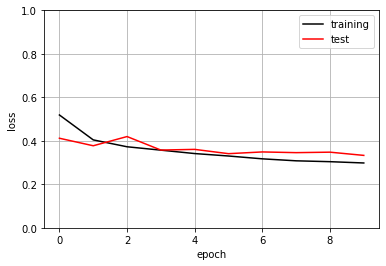

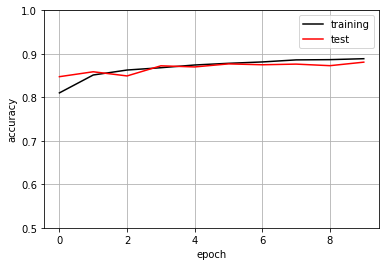

In [5]:
# 損失（誤り率）、正解率をグラフにする
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 訓練データの正解率をプロット
plt.plot(history.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_accuracy'],
         label='test',
         color='red')
plt.ylim(0.5, 1)      # y軸の範囲
plt.legend()          # 凡例を表示
plt.grid()            # グリッド表示
plt.xlabel('epoch')   # x軸ラベル
plt.ylabel('accuracy')# y軸ラベル
plt.show()